In [ ]:
# Performing EDA and FEATURE ENGINEERING on cleaned googlePlaystoreDataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [17]:
df=pd.read_csv("google_cleaned.csv")

In [18]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Day
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20


In [19]:
df.shape

(10840, 17)

In [20]:
df[df.duplicated("App")].shape

(1181, 17)

In [21]:
#observation
#Dataset has duplicate record
#we have total of 10840 records but here 1181 are duplicates

In [22]:
df=df.drop_duplicates("App",keep="first")

In [23]:
df.shape

(9659, 17)

In [24]:
df.drop("Last Updated",axis=1,inplace=True)

In [32]:
df.columns[0]
df["Unnamed: 0"]
df.drop("Unnamed: 0",axis=1,inplace=True)

In [34]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Year', 'Month', 'Day'],
      dtype='object')

In [35]:
##EXPLORING DATA NUMERIC AND CATEGORICAL FEATURES

In [36]:
numeric_features=[feature for feature in  df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

In [37]:
print("we have {} numericalFeatures:{}".format(len(numeric_features),numeric_features))
print("we have {} categoricalFeatures:{}".format(len(categorical_features),categorical_features))

we have 8 numericalFeatures:['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Year', 'Month', 'Day']
we have 7 categoricalFeatures:['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [41]:
## proportion of count data on categorical columns
for col in categorical_features:
    #instead of just getting counts get in the proportion form
    print(df[col].value_counts(normalize=True)*100)

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.5

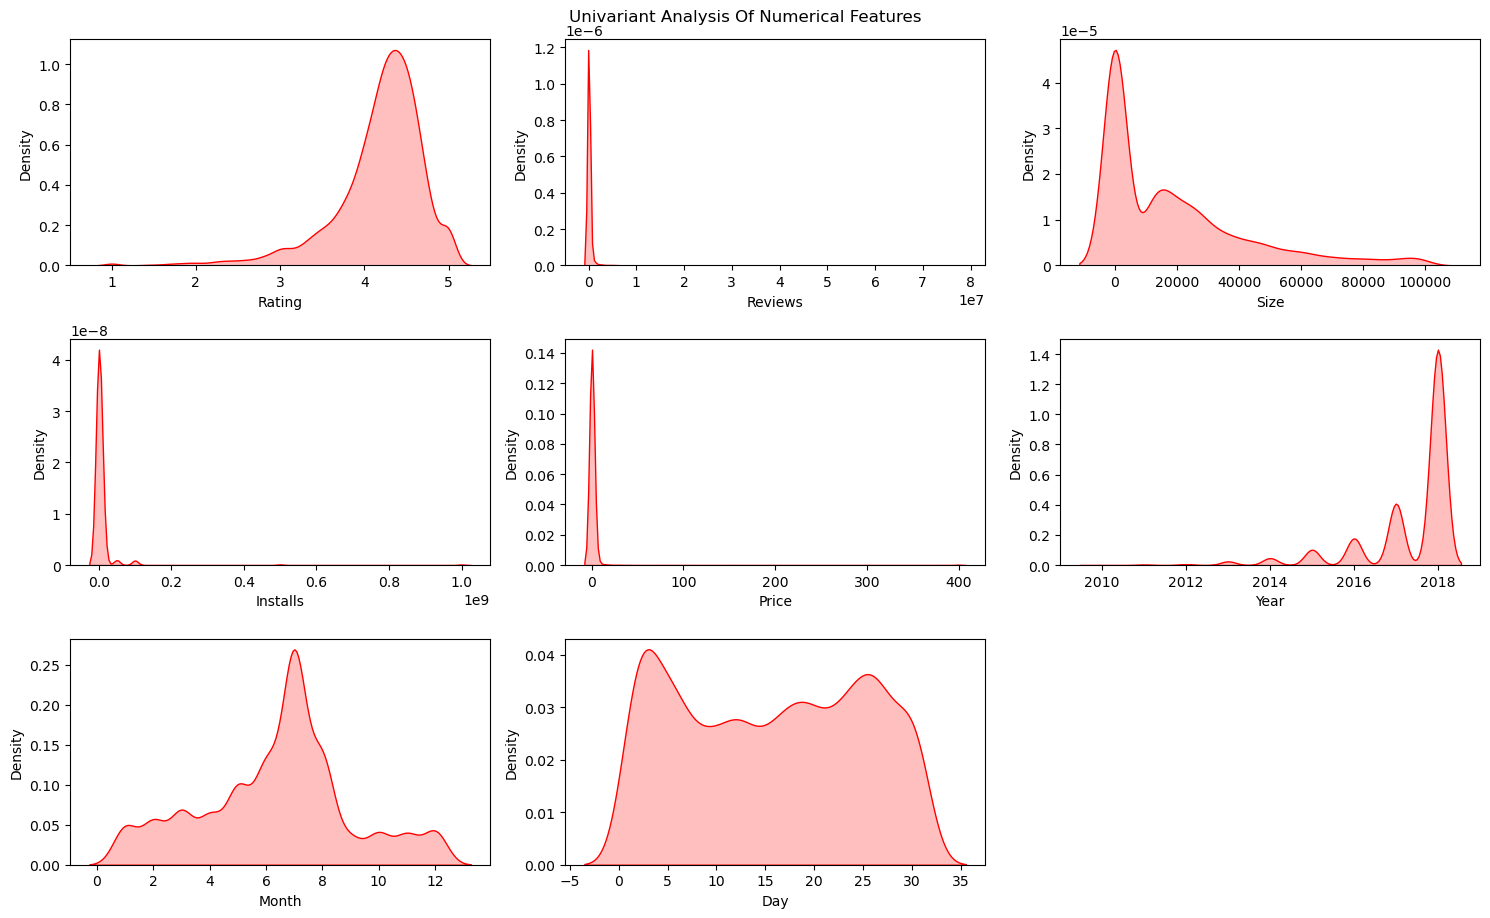

In [42]:
## Proportion of count data on mumeric features
plt.figure(figsize=(15,15))
plt.suptitle("Univariant Analysis Of Numerical Features")
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color="r")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


In [ ]:
#Observations
''' 
RATINGS and YEAR is LEFT-SKEWED
REVIEWS,INSTALLS,PRICE are RIGHTSKEWED
'''

In [43]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

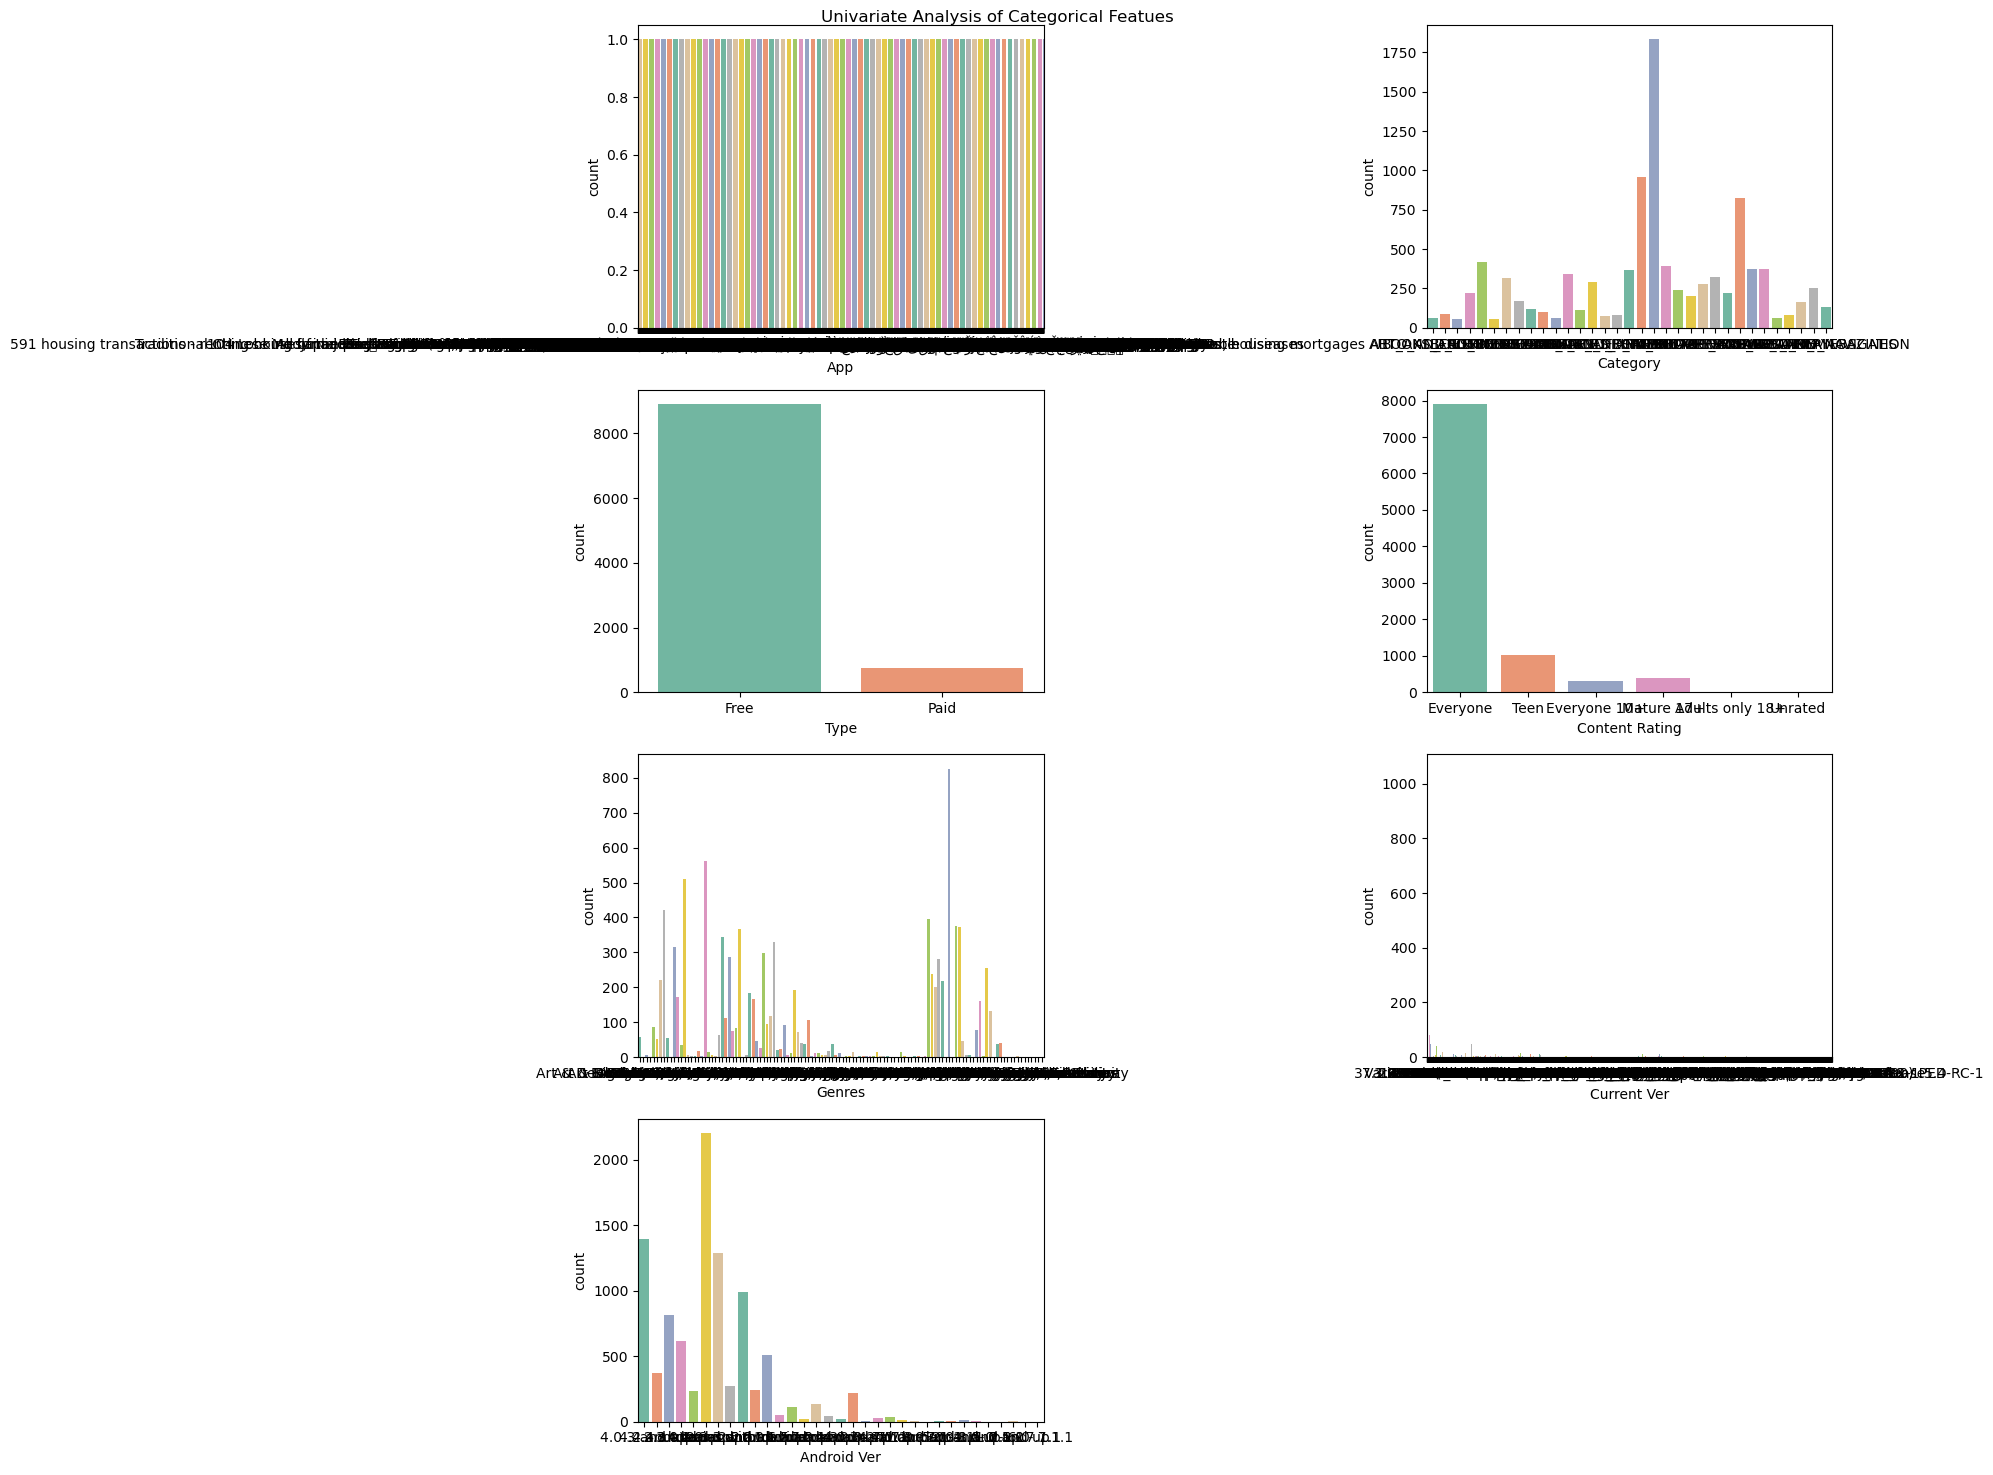

In [44]:
##Similarly for categorical features
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Featues")
for i in range(0,len(categorical_features)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[categorical_features[i]],palette="Set2")
    plt.xlabel(categorical_features[i])
    #plt.xticks(rotation 45)
    plt.tight_layout()

In [ ]:
#Which is the most popular app category

In [45]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Year,Month,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,1,15


<Axes: ylabel='count'>

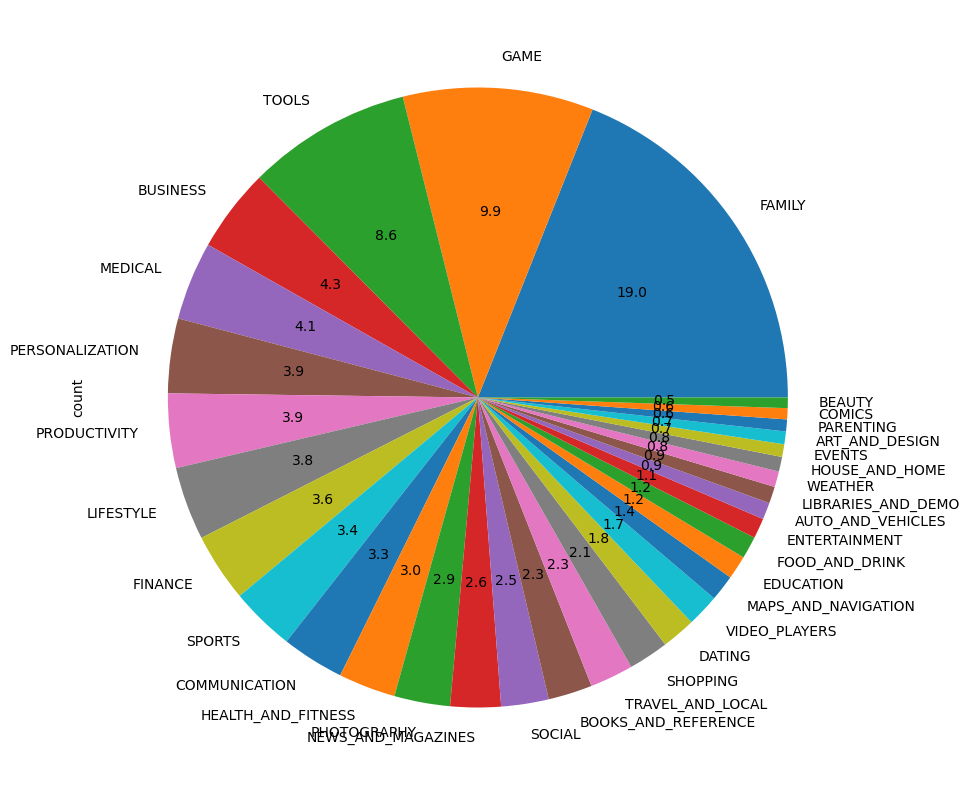

In [53]:
df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(10,17),autopct="%1.1f")

In [ ]:
##Observation 
''' 
1)There are more kinds of apps in playstore which are under Category of Family,Game,Tools
2)Beauty,Comics,Parenting kinds of apps are very less in playstore
'''

In [56]:
## TOP 10 App Categories
df["Category"].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [57]:
category=pd.DataFrame(df["Category"].value_counts())

In [58]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
